# Project: Investigate a Dataset - No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset contains information centered around the question of whether or not a patient attended their medical appointment in Brazil.

The dataset is made up of the following columns;
PatientId: Patient identification,
AppointmentID: Appointment identification,
Gender: Gender of the patient (Male/Female),
ScheduledDay: The day the appointment was made,
AppointmentDay: The date of the appointment,
Age: Age of the patient,
Neighbourhood: Location where the appointment takes place,
Scholarship: Whether the patient is part of the Brazilian social welfare program - Bolsa Família,
Hipertension: Whether the patient suffers from hypertension (True/False),
Diabetes: Whether the patient suffers from diabetes (True/False),
Alcoholism: Whether the patient suffers from alcoholism (True/False),
Handcap: Whether the patient is Handicapped (True/False),
SMS_received: Whether the patient received 1 or more messages and No-show: Whether the patient didn't attend their appointment (Yes/No).

### Question(s) for Analysis

* What percent of patients do not attend their scheduled appointment?
* Does gender play a factor in whether a patient will attend their scheduled appointment?
* Does a pre-existing condition play a factor in whether a patient will attend their scheduled appointment?
* Does receiving an sms play a factor in whether a patient will attend their scheduled appointment?
* Does having a scholarship play a factor in whether a patient will attend their scheduled appointment?
* Does age play a factor in whether a patient will attend their scheduled appointment?

In [268]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [269]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [270]:
# Load data and print out a few lines
df = pd.read_csv("Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


From inspecting the table column names we can see that there are some inconsistencies and typos in the column names we need to fix "Hipertension", "Handcap" and "No-Show".

In [271]:
# Determine the number of rows and columns
df.shape

(110527, 14)

From the above output we see that there are 110527 entries in this dataset.

#### Inspecting data types

In [272]:
# Inspect data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


From inspecting the cell above and first 5 entries we can see that there are some inconsistencies in the dataset. We need to change the type of PatientId to be int as it is currently float. We also see that the time of the AppointmentDay is missing. We should remove the time component for both ScheduledDay and AppointmentDay for consistency.

#### Check for missing or duplicated data

In [273]:
# Look for missing data
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [274]:
# Look for duplicated data
df.duplicated().sum()

0

From the three cells above we can see that there is no missing or duplicated data in this dataset.

#### Check for invalid data

In [275]:
# Look for invalid data
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

From inspecting the above output we see that the min age is -1 and the max age is 115. These values seems unlikely let's investigate further.

In [276]:
# Filter dataset for rows were age is less than 0
df_age_less_0 = df.query('Age < 0')
df_age_less_0.PatientId.count()

1

In [277]:
df_age_less_0

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


From the above output we see that there is only a single patient whose age is less than 0. Let's assume that this was a typo and can be removed.

In [278]:
# Filter dataset for rows were age is equal to 0
df_age_0 = df.query('Age == 0')
print(df_age_0.PatientId.count())
df_age_0.head()

3539


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No


From the above output we see that there are 3539 entries where the patient's age is 0. Let's assume that these patients are infants and confirm this assumption by checking that these patients don't have hypertension, diabetes or alcoholism.

In [279]:
df_age_0.eval('Hipertension == 1 or Diabetes == 1 or Alcoholism == 1').any()

False

From the above output we see that these patients don't have hypertension, diabetes or alcoholism. We will treat these patients as infants.

In [280]:
# Filter dataset for rows were age is more than or equal to 100
df_age_100 = df.query('Age >= 100')
print(df_age_100.PatientId.count())
df_age_100.sample(n=5)

11


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
58014,9.762948e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
79270,9.739430e+12,5747809,M,2016-05-30T16:21:56Z,2016-05-31T00:00:00Z,100,TABUAZEIRO,0,0,0,0,1,0,No
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes


From the above output we see that there are 11 entries where the patient's age is 100 or more. There are too many to be a typo, so let's assume that these are valid entries.


### Data Cleaning
 

#### Renaming Columns

In [281]:
# Lets rename the columns to fix the inconsistencies and typos.
df.rename(columns = {"Hipertension":"Hypertension", "Handcap":"Handicapped", "No-show":"No_show"}, inplace=True)
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicapped', 'SMS_received', 'No_show'],
      dtype='object')

#### Fixing data types

In [282]:
# Convert PatientId to int.
df['PatientId'] = df['PatientId'].astype(int)
df.PatientId.dtype

dtype('int64')

#### Remove time component

In [283]:
# Create function to remove time
def remove_time(df_date):
    return pd.to_datetime(df_date, format='%Y-%m-%d').dt.date

In [284]:
# Remove time for consistency as AppointmentDay time is missing
df['ScheduledDay'] = remove_time(df.ScheduledDay)
df['AppointmentDay'] = remove_time(df.AppointmentDay)
df.sample(n=1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,No_show
87666,458199273444,5778033,M,2016-06-06,2016-06-06,74,JOANA D´ARC,0,0,0,0,0,0,No


#### Remove invalid data

In [285]:
# Remove entry with age equal to -1, assuming this is a typo
df.drop(index=df.query('Age < 0').index, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

#### Create functions

In [286]:
# This function creates a comparison bar chart
def create_double_bar_chart(n_elements, spacing, x_lables, s1, s2, s1_label, s2_label, x_label, y_label, title):
    # Set figure size
    fig, ax = plt.subplots(figsize =(14, 6))
    
    # Set x-axis locations
    x_location = np.arange(n_elements)
    
    # Set bars width
    width = spacing
    
    # Create bar chart
    ax.bar(x_location, s1, color='b', width=width, edgecolor='black', label=s1_label)
    ax.bar(x_location + width, s2, color='r', width=width, edgecolor='black', label=s2_label)
    
    plt.xticks(x_location + width/2, x_lables)
    
    # Add title, x and y label
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Add legend
    plt.legend();

In [287]:
# This function creates a pie chart

# Create wedge labels
def wedge_label(pct):
    return "{:.1f}%".format(pct)

# Create pie chart
def create_pie_chart(w_labels, s1, x_label, title):
    # Set figure size
    fig, ax = plt.subplots(figsize =(8, 8))
    
    # Set wedge properties
    wp = {'edgecolor':"black"}
    
    # Set wedges colour
    colors = ("blue", "red", "magenta", "cyan", "green")
    
    # Create pie chart
    wedges, texts, autotexts = ax.pie(s1, autopct = lambda pct: wedge_label(pct), labels = w_labels,
                                      colors = colors, startangle = 90, wedgeprops = wp,
                                      textprops = dict(color ="black"))
 
    # Add legend
    ax.legend(wedges, w_labels, title =x_label, loc ="center left", bbox_to_anchor =(1, 0, 0.5, 1))
    plt.setp(autotexts, size = 10)
    
    # Add title
    plt.title(title);

In [288]:
# This function calculates percentage
def perc(count, total):
    return count/total

### Determine percentage of patients attending/missing their appointment

In [289]:
# Determine total number of patients
nr_patients = df.Age.count()
nr_patients

110526

In [290]:
# Filter dataset on no_show
df_noshow = df.query('No_show == "Yes"')
df_show = df.query('No_show == "No"')

In [291]:
# Determine number of show/no-show
nr_noshow = df_noshow.Age.count()
nr_show = df_show.Age.count()
nr_noshow

22319

In [292]:
# Determine the percentage of patients who attend and don't attend their appointments
noshow_perc = perc(df_noshow.Age.count(), nr_patients)
show_perc = perc(df_show.Age.count(), nr_patients)

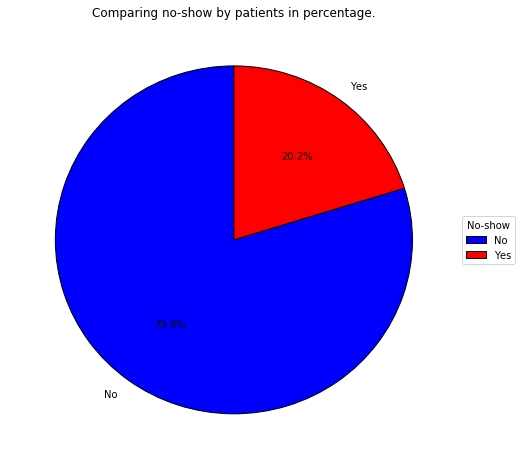

In [293]:
# Create a pie chart to show the percentage of patients attending/missing appointments
s1 = [show_perc, noshow_perc]
w_labels = df.No_show.unique()
x_label = "No-show"
title = "Comparing no-show by patients in percentage."
create_pie_chart(w_labels, s1, x_label, title)

From the above plot we see that about 20.2% of patients didn't and 79.8% of patients did attend their appointment.

In [294]:
# Look at the features associated with not attending the appointment
df_noshow.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received
count,2.231900e+04,2.231900e+04,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000
mean,1.467523e+14,5.652259e+06,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371
std,2.549905e+14,7.429686e+04,21.965941,0.319640,0.374764,0.244885,0.171505,0.156670,0.496198
min,5.628261e+06,5.122866e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.176779e+12,5.614192e+06,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.156794e+13,5.657916e+06,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.454270e+13,5.703175e+06,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.996585e+14,5.789986e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Does gender influence attendance

In [295]:
# Determine unique options for gender
df.Gender.unique()

array(['F', 'M'], dtype=object)

In [296]:
# Determine number of male and female patients
nr_female = df[df['Gender'] == "F"].Age.count()
nr_male = df[df['Gender'] == "M"].Age.count()

In [297]:
# Filter dataset on Gender ['F' 'M']
female_noshow = df_noshow[df_noshow['Gender'] == "F"].Age.count()
male_noshow = df_noshow[df_noshow['Gender'] == "M"].Age.count()
female_show = df[df['Gender'] == "F"].Age.count() - female_noshow
male_show = df[df['Gender'] == "M"].Age.count() - male_noshow

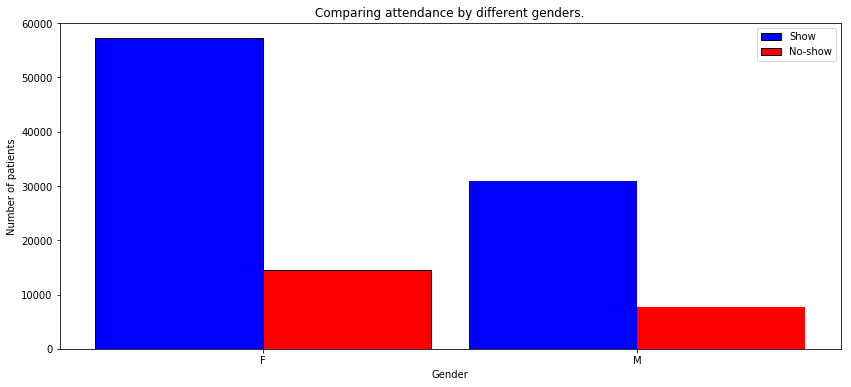

In [298]:
# Create a bar chart to show the comparison of attendance between different genders
nr_options = df.Gender.nunique()
s1 = [female_show, male_show]
s2 = [female_noshow, male_noshow]
labels = df.Gender.unique()
x_label = "Gender"
y_label = "Number of patients"
title = "Comparing attendance by different genders."
create_double_bar_chart(nr_options, 0.45, labels, s1, s2, "Show", "No-show", x_label, y_label, title)

In [299]:
# Calculate percentage of female patients missing their appointment
female_noshow_perc = perc(female_noshow, nr_female)
female_noshow_perc

0.20314870752655242

In [300]:
# Calculate percentage of male patients missing their appointment
male_noshow_perc = perc(male_noshow, nr_male)
male_noshow_perc

0.19967947889471915

From the above plot and calculation we see that about 20% of male and female patients missed their appointment. Gender doesn't have a significant influence on attendance.

### Does a pre-existing condition influence attendance

#### Determine if diabetes influences attendance

In [301]:
# Determine unique options for diabetes
df.Diabetes.unique()

array([0, 1])

In [302]:
# Determine number of patients with diabetes
nr_diabetes = df.query('Diabetes == 1').Age.count()
nr_diabetes

7943

In [303]:
# Filter dataset on diabetes [0 1]
diabetes_noshow = df_noshow.query('Diabetes == 1').Age.count()
non_diabetes_noshow = df_noshow.query('Diabetes == 0').Age.count()
diabetes_show = nr_diabetes - diabetes_noshow
non_diabetes_show = df.query('Diabetes == 0').Age.count() - non_diabetes_noshow

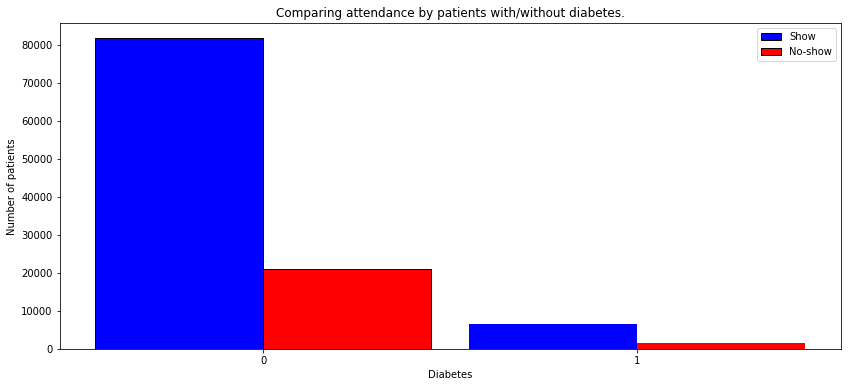

In [304]:
# Create a bar chart to show the comparison of attendance between patients with/without diabetes
nr_options = df.Diabetes.nunique()
s1 = [non_diabetes_show, diabetes_show]
s2 = [non_diabetes_noshow, diabetes_noshow]
labels = df.Diabetes.unique()
x_label = "Diabetes"
y_label = "Number of patients"
title = "Comparing attendance by patients with/without diabetes."
create_double_bar_chart(nr_options, 0.45, labels, s1, s2, "Show", "No-show", x_label, y_label, title)

In [305]:
# Calculate percentage of patients with diabetes missing their appointment
diabetes_noshow_perc = perc(diabetes_noshow, nr_diabetes)
diabetes_noshow_perc

0.18003273322422259

In [306]:
# Calculate percentage of patients without diabetes missing their appointment
non_diabetes_noshow_perc = perc(non_diabetes_noshow, non_diabetes_noshow + non_diabetes_show)
non_diabetes_noshow_perc

0.20363023112991432

From the above plot and calculation it seems that diabetes has a small influence on attendance. A patient with diabetes is slightly more likely to attend their appointment, only 18% of patients with diabetes missed their appointment.

#### Determine if alcoholism influences attendance

In [307]:
# Determine unique options for alcoholism
df.Alcoholism.unique()

array([0, 1])

In [308]:
# Determine number of patients with alcoholism
nr_alcoholism = df.query('Alcoholism == 1').Age.count()
nr_alcoholism

3360

In [309]:
# Filter dataset on alcholism
alcoholism_noshow = df_noshow.query('Alcoholism == 1').Age.count()
non_alcoholism_noshow = df_noshow.query('Alcoholism == 0').Age.count()
alcoholism_show = nr_alcoholism - alcoholism_noshow
non_alcoholism_show = df.query('Alcoholism == 0').Age.count() - non_alcoholism_noshow

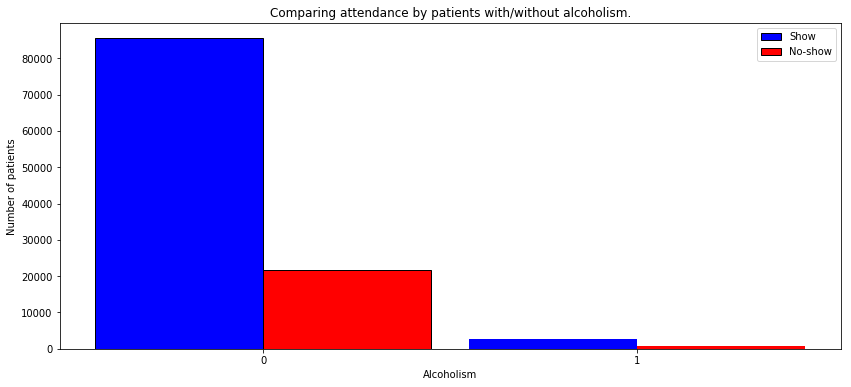

In [310]:
# Create a bar chart to show the comparison of attendance between patients with/without alcoholism
nr_options = df.Alcoholism.nunique()
s1 = [non_alcoholism_show, alcoholism_show]
s2 = [non_alcoholism_noshow, alcoholism_noshow]
labels = df.Alcoholism.unique()
x_label = "Alcoholism"
y_label = "Number of patients"
title = "Comparing attendance by patients with/without alcoholism."
create_double_bar_chart(nr_options, 0.45, labels, s1, s2, "Show", "No-show", x_label, y_label, title)

In [311]:
# Calculate percentage of patients with alcoholism missing their appointment
alcoholism_noshow_perc = perc(alcoholism_noshow, nr_alcoholism)
alcoholism_noshow_perc

0.20148809523809524

In [312]:
# Calculate percentage of patients without alcoholism missing their appointment
non_alcoholism_noshow_perc = perc(non_alcoholism_noshow, non_alcoholism_noshow + non_alcoholism_show)
non_alcoholism_noshow_perc

0.20194837915010358

From the above plot and calculation we see that about 20% of patients irrespective of alcoholism missed their appointment. Alcoholism doesn't have a significant influence on attendance.

#### Determine if hypertension influences attendance

In [313]:
# Determine unique options for hypertension
df.Hypertension.unique()

array([1, 0])

In [314]:
# Determine number of patients with hypertension
nr_hypertension = df.query('Hypertension == 1').Age.count()
nr_hypertension

21801

In [315]:
# Determine if a patient with hypertension is more likely to miss an appointment
# Filter dataset on hypertension
hypertension_noshow = df_noshow.query('Hypertension == 1').Age.count()
non_hypertension_noshow = df_noshow.query('Hypertension == 0').Age.count()
hypertension_show = nr_hypertension - hypertension_noshow
non_hypertension_show = df.query('Hypertension == 0').Age.count() - non_hypertension_noshow

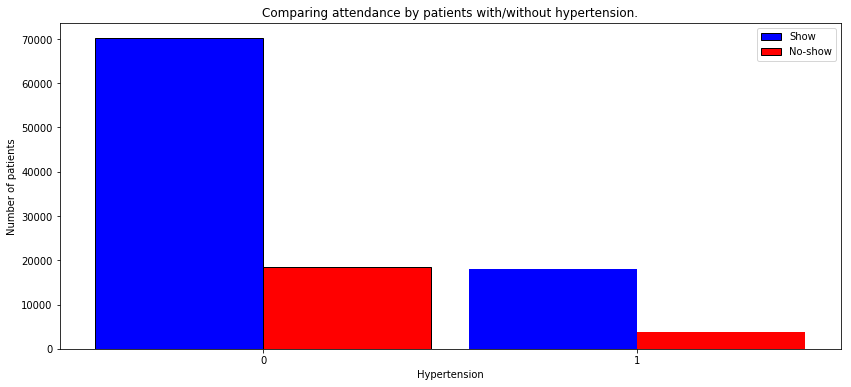

In [316]:
# Create a bar chart to show the comparison of attendance between patients with/without hypertension
nr_options = df.Hypertension.nunique()
s1 = [non_hypertension_show, hypertension_show]
s2 = [non_hypertension_noshow, hypertension_noshow]
labels = ["0", "1"]
x_label = "Hypertension"
y_label = "Number of patients"
title = "Comparing attendance by patients with/without hypertension."
create_double_bar_chart(nr_options, 0.45, labels, s1, s2, "Show", "No-show", x_label, y_label, title)

In [317]:
# Calculate percentage of patients with hypertension missing their appointment
hypertension_noshow_perc = perc(hypertension_noshow, nr_hypertension)
hypertension_noshow_perc

0.17301958625751113

In [318]:
# Calculate percentage of patients without hypertension missing their appointment
non_hypertension_noshow_perc = perc(non_hypertension_noshow, non_hypertension_noshow + non_hypertension_show)
non_hypertension_noshow_perc

0.2090391659622429

From the above plot and calculation it seems that hypertension has a small influence on attendance. A patient with hypertension is slightly more likely to attend their appointment, only 17% of patients with hypertension missed their appointment.

#### Determine if handicap influences attendance

In [319]:
# Determine unique options for handicapped
df.Handicapped.unique()

array([0, 1, 2, 3, 4])

In [339]:
# Determine total number of patients with a handicap
nr_handicapped = df.query('Handicapped != 0').Age.count()
nr_handicapped

2241

In [340]:
# Determine number of patients with handicap 1
nr_hc1 = df.query('Handicapped == 1').Age.count()
nr_hc1

2042

In [341]:
# Determine number of patients with handicap 2
nr_hc2 = df.query('Handicapped == 2').Age.count()
nr_hc2

183

In [342]:
# Determine number of patients with handicap 3
nr_hc3 = df.query('Handicapped == 3').Age.count()
nr_hc3

13

In [343]:
# Determine number of patients with handicap 4
nr_hc4 = df.query('Handicapped == 4').Age.count()
nr_hc4

3

In [330]:
# Filter dataset on handicapped
hc1_noshow = df_noshow.query('Handicapped == 1').Age.count()
hc1_show = df.query('Handicapped == 1').Age.count() - hc1_noshow
hc2_noshow = df_noshow.query('Handicapped == 2').Age.count()
hc2_show = df.query('Handicapped == 2').Age.count() - hc2_noshow
hc3_noshow = df_noshow.query('Handicapped == 3').Age.count()
hc3_show = df.query('Handicapped == 3').Age.count() - hc3_noshow
hc4_noshow = df_noshow.query('Handicapped == 4').Age.count()
hc4_show = df.query('Handicapped == 4').Age.count() - hc4_noshow
non_hc_noshow = df_noshow.query('Handicapped == 0').Age.count()
non_hc_show = df.query('Handicapped == 0').Age.count() - non_hc_noshow

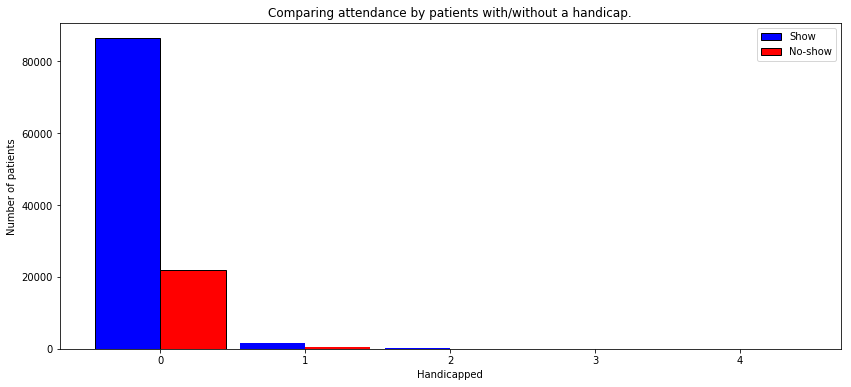

In [331]:
# Create a bar chart to show the comparison of attendance between patients with/without a handicap
nr_options = df.Handicapped.nunique()
s1 = [non_hc_show, hc1_show, hc2_show, hc3_show, hc4_show]
s2 = [non_hc_noshow, hc1_noshow, hc2_noshow, hc3_noshow, hc4_noshow]
labels = df.Handicapped.unique()
x_label = "Handicapped"
y_label = "Number of patients"
title = "Comparing attendance by patients with/without a handicap."
create_double_bar_chart(nr_options, 0.45, labels, s1, s2, "Show", "No-show", x_label, y_label, title)

In [332]:
# Calculate percentage of patients with handicap 1 missing their appointment
hc1_noshow_perc = perc(hc1_noshow, nr_hc1)
hc1_noshow_perc

0.1792360430950049

In [333]:
# Calculate percentage of patients with handicap 2 missing their appointment
hc2_noshow_perc = perc(hc2_noshow, nr_hc2)
hc2_noshow_perc

0.20218579234972678

In [334]:
# Calculate percentage of patients with handicap 3 missing their appointment
hc3_noshow_perc = perc(hc3_noshow, nr_hc3)
hc3_noshow_perc

0.23076923076923078

In [335]:
# Calculate percentage of patients with handicap 4 missing their appointment
hc4_noshow_perc = perc(hc4_noshow, nr_hc4)
hc4_noshow_perc

0.3333333333333333

In [336]:
# Calculate percentage of patients with a handicap missing their appointment
hc_noshow_perc = perc(hc1_noshow + hc2_noshow + hc3_noshow + hc4_noshow, nr_handicapped)
hc_noshow_perc

0.18161535029004908

In [344]:
# Calculate percentage of patients without a handicap missing their appointment
non_hc_noshow_perc = perc(non_hc_noshow, non_hc_noshow + non_hc_show)
non_hc_noshow_perc

0.20235489680011082

From the above plot and calculations it seems that handicapped has a small influence on attendance. A patient with a handicap is slightly more likely to attend their appointment, only 18% of patients with a handicap missed their appointment. For handicapped 3 and 4 the likelihood of missing an appointment increases but this is due to the small number of patients falling in this range respectively 13 and 3.

#### Does a pre-existing condition influences attendance?

This is dependent on the condition. A patient with diabetes, hypertension or who is handicapped is slightly more likely to attend their appointment. Only 17%, 18% and 18% respectively of patients with diabetes, hypertension or who is handicapped missed their appointment. Alcoholism doesn't have a significant influence on attendance.

### Does receiving an sms influence attendance

In [345]:
# Determine unique options for sms_received
df.SMS_received.unique()

array([0, 1])

In [346]:
# Determine number of patients with sms_received
nr_sms_received = df.query('SMS_received == 1').Age.count()
nr_sms_received

35482

In [347]:
# Filter dataset on sms_received
sms_noshow = df_noshow.query('SMS_received == 1').Age.count()
sms_show = nr_sms_received - sms_noshow
no_sms_noshow = df_noshow.query('SMS_received == 0').Age.count()
no_sms_show = df.query('SMS_received == 0').Age.count() - no_sms_noshow

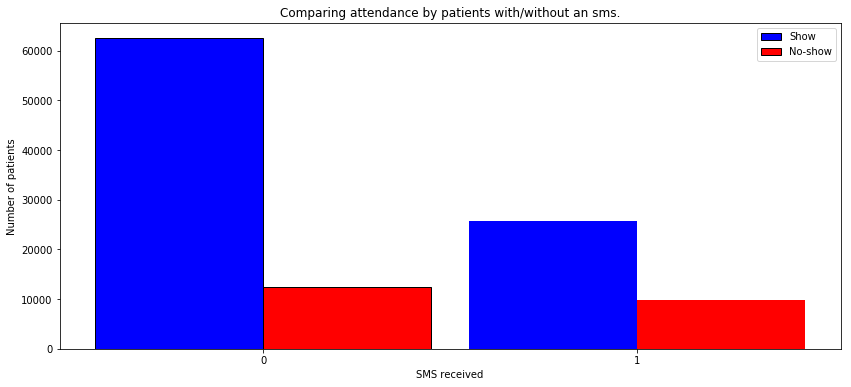

In [348]:
# Create a bar chart to show the comparison of attendance between patients with/without an sms_received
nr_options = df.SMS_received.nunique()
s1 = [no_sms_show, sms_show]
s2 = [no_sms_noshow, sms_noshow]
labels = df.SMS_received.unique()
x_label = "SMS received"
y_label = "Number of patients"
title = "Comparing attendance by patients with/without an sms."
create_double_bar_chart(nr_options, 0.45, labels, s1, s2, "Show", "No-show", x_label, y_label, title)

In [349]:
# Calculate percentage of patients with sms_received missing their appointment
sms_noshow_perc = perc(sms_noshow, nr_sms_received)
sms_noshow_perc

0.27574544839637

In [350]:
# Calculate percentage of patients without sms_received missing their appointment
no_sms_noshow_perc = perc(no_sms_noshow, no_sms_noshow + no_sms_show)
no_sms_noshow_perc

0.16703533926762965

From the above plot and calculations it seems that sms received has some influence on attendance. A patient who received an sms is slightly more likely to miss their appointment, 28% of patients who received an sms missed their appointment.

### Does having a scholarship influence attendance

In [351]:
# Determine unique options for scholarship
df.Scholarship.unique()

array([0, 1])

In [352]:
# Determine number of patients with a scholarship
nr_scholarship = df.query('Scholarship == 1').Age.count()
nr_scholarship

10861

In [353]:
# Filter dataset on scholarship
scholarship_noshow = df_noshow.query('Scholarship == 1').Age.count()
scholarship_show = nr_scholarship - scholarship_noshow
no_scholarship_noshow = df_noshow.query('Scholarship == 0').Age.count()
no_scholarship_show = df.query('Scholarship == 0').Age.count() - no_scholarship_noshow

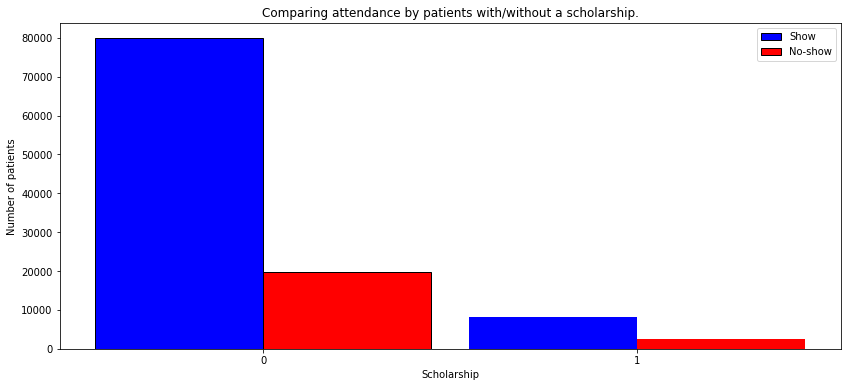

In [354]:
# Create a bar chart to show the comparison of attendance between patients with/without a scholarship
nr_options = df.Scholarship.nunique()
s1 = [no_scholarship_show, scholarship_show]
s2 = [no_scholarship_noshow, scholarship_noshow]
labels = df.Scholarship.unique()
x_label = "Scholarship"
y_label = "Number of patients"
title = "Comparing attendance by patients with/without a scholarship."
create_double_bar_chart(nr_options, 0.45, labels, s1, s2, "Show", "No-show", x_label, y_label, title)

In [355]:
# Calculate percentage of patients with a scholarship missing their appointment
scholarship_noshow_perc = perc(scholarship_noshow, nr_scholarship)
scholarship_noshow_perc

0.2373630420771568

In [356]:
# Calculate percentage of patients without a scholarship missing their appointment
no_scholarship_noshow_perc = perc(no_scholarship_noshow, no_scholarship_noshow + no_scholarship_show)
no_scholarship_noshow_perc

0.19807354638037425

From the above plot and calculations it seems that having a scholarship has some influence on attendance. A person with a scholarship is slightly more likely to miss their appointment, 24% of patients with a scholarship missed their appointment.

### Does age influence attendance

In [357]:
# Look at age distribution
df.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [358]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [-1, 2, 10, 20, 30, 40, 60, 80, 116]

In [359]:
# Labels for the seven age categories
bin_names = ['infancy', 'childhood', 'adolescence', 'early_adulthood', 'adulthood', 'middle_age', 'early_elder', 'late_elder'] 

In [360]:
# Creates age_category column
df['age_category'] = pd.cut(df['Age'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
df.sample(n=5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,No_show,age_category
65626,673883673476169,5653119,F,2016-05-03,2016-05-17,18,SÃO CRISTÓVÃO,0,0,0,0,0,0,Yes,adolescence
71723,968774538815491,5691961,F,2016-05-12,2016-05-12,56,SÃO CRISTÓVÃO,0,1,0,0,0,0,No,middle_age
90935,647855282724244,5783169,F,2016-06-07,2016-06-07,52,PRAIA DO CANTO,0,0,0,0,0,0,No,middle_age
15481,94211979774227,5666284,F,2016-05-05,2016-05-12,20,JESUS DE NAZARETH,0,0,0,0,0,1,Yes,adolescence
73913,165365543532788,5671143,M,2016-05-06,2016-05-30,58,SÃO PEDRO,0,1,1,0,0,1,No,middle_age


In [361]:
# Determine number of show/no-show per age category
df_noshow_age = df.query('No_show == "Yes"').groupby("age_category").count()
df_show_age = df.query('No_show == "No"').groupby("age_category").count()

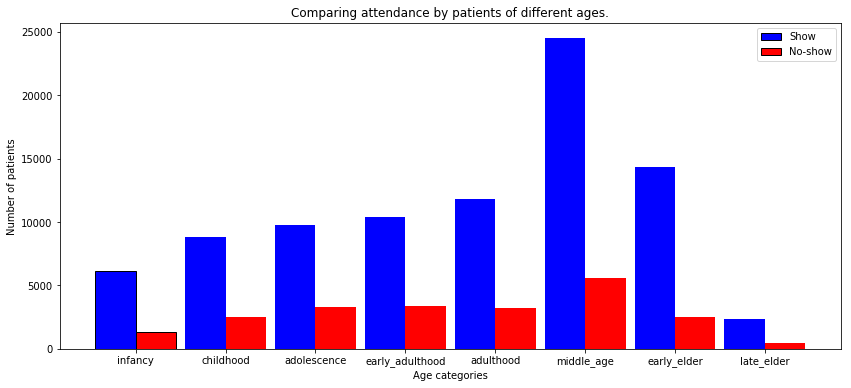

In [362]:
# Create a bar chart to show the comparison of attendance between patients of different ages
nr_options = len(bin_names)
s1 = df_show_age.No_show.values
s2 = df_noshow_age.No_show.values
labels = bin_names
x_label = "Age categories"
y_label = "Number of patients"
title = "Comparing attendance by patients of different ages."
create_double_bar_chart(nr_options, 0.45, labels, s1, s2, "Show", "No-show", x_label, y_label, title)

In [363]:
# Calculate percentage of patients of different ages missing their appointment
age_noshow_perc = perc(df_noshow_age.No_show.values, df_noshow_age.No_show.values + df_show_age.No_show.values)
age_noshow_perc

array([0.17577389, 0.21927732, 0.25253836, 0.24624537, 0.2147223 ,
       0.18586483, 0.15002957, 0.164446  ])

From the above plot and calculations it seems that age has some influence on attendance. A patient in the infancy, middle_age, early_elder or late_elder category is slightly more likely to attend their appointment, respectively 17.6%, 18.6%, 15% and 16% of patients in these age categories missed their appointment. A patient in the childhood, adolescence, early_adulthood or adulthood category is slightly more likely to miss their appointment, respectively 21.9%, 25%, 24.6% and 21.5% of patients in these age categories missed their appointment.

<a id='conclusions'></a>
## Conclusions

#### Discussion:
In order to determine what percentage of patients don't attend their scheduled appointment, the percentage of show and no-show patients was calculated and then plotted on a pie chart. From the chart we saw that 20.2% of patients didn't and 79.8% of patients did attend their scheduled appointment.

In order to determine if gender plays a factor in whether a patient will attend their scheduled appointment, the number and percentage of male and female show/no-show patients were calculated. A plot was created to compare genders and the number of show/no-shows. From the gender show/no-show comparison plot and calculation we saw that about 20% of male and female patients missed their appointment. It can be concluded that gender doesn't have a significant influence on attendance.

In order to determine whether a pre-existing condition influences attendance the number and percentage of show/no-show for patients with/without diabetes, alcoholism, hypertension and handicapped was calculated. A plot was created to compare each condition and the number of show/no-shows.

From the diabetes show/no-show comparison plot and calculation we saw that diabetes has a small influence on attendance. A patient with diabetes is slightly more likely to attend their appointment, only 18% of patients with diabetes missed their appointment.

From the alcoholism show/no-show comparison plot and calculation we see that about 20% of patients irrespective of alcoholism missed their appointment. Alcoholism doesn't have a significant influence on attendance.

From the hypertension show/no-show comparison plot and calculation it seems that hypertension has a small influence on attendance. A patient with hypertension is slightly more likely to attend their appointment, only 17% of patients with hypertension missed their appointment.

From the handicapped show/no-show comparison plot and calculations it seems that handicapped has a small influence on attendance. A patient with a handicap is slightly more likely to attend their appointment, only 18% of patients with a handicap missed their appointment. For handicapped 3 and 4 the likelihood of missing an appointment increases but this is due to the small number of patients falling in this range respectively 13 and 3.

Does a pre-existing condition influences attendance? This is dependent on the condition. A patient with diabetes, hypertension or who is handicapped is slightly more likely to attend their appointment. Alcoholism doesn't have a significant influence on attendance.

In order to determine if receiving an sms plays a factor in whether a patient will attend their scheduled appointment the number and percentage of show/no-show for patients who received/didn't receive an sms was calculated. A plot was created to compare sms received/didn't receive and the number of show/no-shows. From the sms received show/no-show comparison plot and calculations it seems that sms received has some influence on attendance. A patient who received an sms is slightly more likely to miss their appointment, 28% of patients who received an sms missed their appointment. An assumption was made that this was a reminder sms of their appointment, but this might not be the case.

In order to determine whether having a scholarship influences attendance the number and percentage of show/no-show for patients with/without a scholarship was calculated. A plot was created to compare scholarship and the number of show/no-shows. From the scholarship show/no-show comparison plot and calculations it seems that having a scholarship has some influence on attendance. A patient with a scholarship is slightly more likely to miss their appointment, 24% of patients with a scholarship missed their appointment.

In order to determine whether age influences attendance the number and percentage of show/no-show for patients in different age categories were calculated. A plot was created to compare age categories and the number of show/no-shows. From the age category show/no-show comparison plot and calculations it seems that age has some influence on attendance. A patient in the infancy, middle_age, early_elder or late_elder category is slightly more likely to attend their appointment, respectively 17.6%, 18.6%, 15% and 16% of patients in these age categories missed their appointment. A patient in the childhood, adolescence, early_adulthood or adulthood category is slightly more likely to miss their appointment, respectively 21.9%, 25%, 24.6% and 21.5% of patients in these age categories missed their appointment. My exploration was limited to 8 age categories, for a better understanding of if certain ages influence no-show more than others all ages should be explored.

#### Results: Our data implies that
1. Appointments are missed by 20.2% of patients.
2. 20% of male and female patients missed their appointment.
3. A patient with a pre-existing condition (diabetes, hypertension or who is handicapped) is 2-3% more likely to attend their appointment than a patient without a pre-existing condition. 
4. A patient who received an sms is 10% more likely to miss their appointment than a patient who didn't receive an sms.
5. A patient with a scholarship is 4% more likely to miss their appointment than a patient without a scholarship. 
6. A patient who is below 2 and above 39 years of age is 5-10% more likely to attend their appointment than a patient who is 3 to 39 years of age.

#### Limitations: Our data has a few limitations
1. 8 of the 14 columns contained categorical data.
2. We are missing details for some of the columns, which might aid in being able to draw conclusions. For example an explanation of the patient and appointment id would be useful, does the value contain the reason for the appointment or whether the patient has a pre-existing condition. Another example of missing detail is the sms_received column: was this a reminder sms sent to all the patients or only a subset of the patients, when was this sms sent. A final example of missing detail would be the appointment day column which doesn't have the appointment time, which might be an important factor in missing/attending the appointment. 

## Submitting your Project 

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0